### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [5]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Pritam and i like to play cricket")

AIMessage(content="\n<think>\nOkay, the user is Pritam and he likes to play cricket. I should respond in a friendly way. Let me start by greeting him and acknowledging his interest in cricket. Maybe ask him about his favorite player or position? That could keep the conversation going. I should also mention some popular cricket topics like recent matches or tournaments to show I'm engaged. Need to make sure the tone is casual and approachable. Let me check for any typos and keep it concise. Alright, let's put that together.\n\nWait, maybe I should also ask if he prefers playing a particular role, like batting or bowling. And maybe mention the World Cup if it's relevant. Hmm, yes, that sounds good. Let me make sure the questions are open-ended so he can choose what to talk about. Avoid any technical jargon so it's easy to follow. Okay, I think that's all. Time to write the response.\n</think>\n\nHey Pritam! Nice to meet you. Cricket is a fantastic sport—what position do you enjoy playing

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

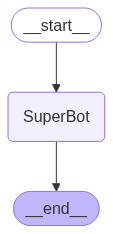

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Pritam And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Pritam And I like cricket', additional_kwargs={}, response_metadata={}, id='ed9ac33c-d1c2-4c2f-8b8c-d4457d53800e'),
  AIMessage(content="\n<think>\nOkay, the user introduced themselves as Pritam and mentioned they like cricket. I should respond warmly. Let me start by greeting them back and acknowledging their name and interest. Maybe ask a follow-up question about their favorite team or player to keep the conversation going. I should keep it friendly and open-ended. Let me make sure there are no typos and that the tone is positive. Alright, let's put that together.\n</think>\n\nHello Pritam! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you have a favorite cricket team or player? Feel free to share anything else you'd like to talk about. 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 22, 'total_tokens': 160, 'completion_time': 0.321084959, 'promp

#### Streaming The responses

In [12]:
for event in graph_builder.stream({"messages":"Hello My name is Pritam"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user said "Hello My name is Pritam". I need to respond appropriately. Let me start with a friendly greeting. I should acknowledge their name to make it personal. Maybe say something like "Hello Pritam! Nice to meet you." Then I can offer assistance by asking how I can help them today. Keep it simple and open-ended so they feel comfortable to ask anything. Let me check if that\'s clear and friendly enough. Yep, that should work.\n</think>\n\nHello Pritam! Nice to meet you. How can I assist you today? Feel free to ask anything! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 17, 'total_tokens': 143, 'completion_time': 0.310094719, 'prompt_time': 0.003379111, 'queue_time': 0.244403948, 'total_time': 0.31347383}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'stop', 'logprobs': None}, id='run--45290c32-c0d4-4bfc-b2ec-8a48bc34dbec